#                                           TP2 DATA CLEANING

**Write your names in the cell below**

**Write names of the 4 variables assigned to your group** (based on file variable_assignments.txt)

****

## Overview of the Data

The BRFSS (Behavioral Risk Factor Surveillance System) data was collected during the period 2013-2014 via monthly telephone-based surveys of randomly selected persons in the US. The rows in this data represent unique persons and the columns represent various demographic, life style, behavioral and health-related information about the interviewed persons.  Data website: https://www.cdc.gov/brfss/annual_data/annual_2013.html

All variables in this dataset are coded (represented) with numeric values, but many of them are truly categorical.

****

<font color='red'> **Files you will need ** </font> 

- File `brfss2013_sub.csv` : contains the data.
- File `data_codebook.html` : contains information about the data variables.
- File `variable_assignments.txt` : contains names of variables assigned to each group.
- File `TP2_Data_Cleaning.ipynb` : contains source code.

<font color='red'> **What you will do** </font> 

- Follow the instructions below and answer the questions.

- Your answers will generally consist of a mix of code and explanations.

- Feel free to create new cells to write your answers.

- Submit your modified .ipynb file containing your answers to the questions below.

******

## Useful functions and methods


**Data exploration**

- head, shape, columns, describe, value_counts, unique, nunique, plot

**Data type conversions**

- `pd.to_numeric` (Pandas function)
- `astype` (Pandas method)

**Dealing with missing values**
- `isna` (Pandas method)
- `fillna` (Pandas method)
- `dropna` (Pandas method)

*****

- to execute a cell, <font color='red'>shift+enter</font>
- to insert a new cell, press the <font color='red'>**+** button</font> in the top menu
- to obtain <font color='red'>help</font> about any method or function use ?

?pd.read_csv

?df.idate.isnull

## Part 1: Read the Data

Answer the following questions.  You need to write python code for some questions.

1. Read the data in file `brfss2013_sub.csv` and store it in a data frame called `df`
2. How many rows and columns are in this data frame?
3. What are the names and true types of the first 5 columns?
4. Are any of these first 5 columns useful for data mining? Explain.

In [1]:

pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
print(pd.options.display.max_rows) 

60


Question 1

In [4]:
pd.options.display.max_rows = 100000

In [5]:
df = pd.read_csv(r"C:\\Users\\zbook studio g7\\Desktop\\ml.dl\\TP\\TP2\\brfss2013_SUB.csv")

Question 2

In [6]:
df.shape

(100000, 91)

Question 3

In [7]:
df.head(5)

idate  imonth  iday  iyear  dispcode       seqno  ladult  numadult  \
0   4302013       4    30   2013      1100  2013009711     NaN       1.0   
1   4242013       4    24   2013      1100  2013003472     NaN       1.0   
2  10232013      10    23   2013      1100  2013006428     NaN       1.0   
3   1192013       1    19   2013      1100  2013000091     NaN       1.0   
4  12052013      12     5   2013      1100  2013004518     NaN       1.0   

   nummen  numwomen  ...  seatbelt  flushot6  flshtmy2  tetanus  pneuvac3  \
0     0.0       1.0  ...       1.0       1.0  102012.0      1.0       1.0   
1     1.0       0.0  ...       1.0       1.0   92012.0      4.0       1.0   
2     0.0       1.0  ...       1.0       1.0  102013.0      4.0       1.0   
3     0.0       1.0  ...       1.0       2.0       NaN      4.0       2.0   
4     0.0       1.0  ...       1.0       2.0       NaN      4.0       2.0   

   hivtst6  hivtstd3  whrtst10  x.imprace  x.age.g  
0      1.0   82012.0       4.0          1        5  
1      2.0       NaN       NaN          1        5  
2      2.0       NaN       NaN          1        6  
3      2.0       NaN       NaN          6        6  
4      2.0       NaN       NaN          1        6  

[5 rows x 91 columns]

In [8]:
i=0
for col in df:
    if i<5:
        i=i+1
        print('col', col)
        print ( df[col].dtypes)
    #df.dtypes[i]


col idate
int64
col imonth
int64
col iday
int64
col iyear
int64
col dispcode
int64


no we can't use any of these data for data mining because they are an numeric numbers 

In [9]:
df.head().describe()

idate     imonth       iday   iyear  dispcode         seqno  \
count  5.000000e+00   5.000000   5.000000     5.0       5.0  5.000000e+00   
mean   6.404013e+06   6.200000  20.200000  2013.0    1100.0  2.013005e+09   
std    4.550030e+06   4.604346   9.364828     0.0       0.0  3.562879e+03   
min    1.192013e+06   1.000000   5.000000  2013.0    1100.0  2.013000e+09   
25%    4.242013e+06   4.000000  19.000000  2013.0    1100.0  2.013003e+09   
50%    4.302013e+06   4.000000  23.000000  2013.0    1100.0  2.013005e+09   
75%    1.023201e+07  10.000000  24.000000  2013.0    1100.0  2.013006e+09   
max    1.205201e+07  12.000000  30.000000  2013.0    1100.0  2.013010e+09   

       ladult  numadult    nummen  numwomen  ...  seatbelt  flushot6  \
count     0.0       5.0  5.000000  5.000000  ...       5.0  5.000000   
mean      NaN       1.0  0.200000  0.800000  ...       1.0  1.400000   
std       NaN       0.0  0.447214  0.447214  ...       0.0  0.547723   
min       NaN       1.0  0.000000  0.000000  ...       1.0  1.000000   
25%       NaN       1.0  0.000000  1.000000  ...       1.0  1.000000   
50%       NaN       1.0  0.000000  1.000000  ...       1.0  1.000000   
75%       NaN       1.0  0.000000  1.000000  ...       1.0  2.000000   
max       NaN       1.0  1.000000  1.000000  ...       1.0  2.000000   

            flshtmy2   tetanus  pneuvac3   hivtst6  hivtstd3  whrtst10  \
count       3.000000  5.000000  5.000000  5.000000       1.0       1.0   
mean    98679.000000  3.400000  1.400000  1.800000   82012.0       4.0   
std      5773.791389  1.341641  0.547723  0.447214       NaN       NaN   
min     92012.000000  1.000000  1.000000  1.000000   82012.0       4.0   
25%     97012.000000  4.000000  1.000000  2.000000   82012.0       4.0   
50%    102012.000000  4.000000  1.000000  2.000000   82012.0       4.0   
75%    102012.500000  4.000000  2.000000  2.000000   82012.0       4.0   
max    102013.000000  4.000000  2.000000  2.000000   82012.0       4.0   

       x.imprace   x.age.g  
count   5.000000  5.000000  
mean    2.000000  5.600000  
std     2.236068  0.547723  
min     1.000000  5.000000  
25%     1.000000  5.000000  
50%     1.000000  6.000000  
75%     1.000000  6.000000  
max     6.000000  6.000000  

[8 rows x 91 columns]

******

# Part 2: Data Exploration and Cleaning

Answer the questions below.

1. Create a list called `my_vars_names` containing the names of the 4 variables that were assigned to your group.

2. Create a new data frame called `my_df` as a subset of `df` containing only the columns in `my_vars_names`.

3. Verify the shape of this new data frame; Make sure its number of rows is the same as in `df`.

4. Determine the **true** type of each variable based on its description in file `data_codebook.html`; is it *categorical*, *discrete*, *continuous*, or **other** ?

5. For each truly *categorical* variable, convert it to the *category* type by calling the `astype` method ...

6. For each numeric variable, determine the unit(s) of measurement of its values based on the description in file `data_codebook.html`. For example: number of times per week; kilograms, etc.  **Be careful**: some variables contain values with different measurement units. For example, the **weight2** variable contains both values in *pounds* and values in *kilograms*! ...

7. For each numeric variable, determine whether it contains any invalid values; that is, values that are inconsistent with the variable's description in file `data_codebook.html`. **Hint**: the `describe` and `unique` methods are helpful ...

8. For each numeric variable, determine whether it contains outliers. **Hint1**: start by visualizing the distribution of the variable using a boxplot or histogram.  **Hint2**: if your variable has multiple units of measurement, use different plots for different units ...

9. For each categorical variable, how many categories does it have? **Hint**: call the `nunique` and/or `value_counts` methods ...

10. For each variable, if it contains **implicitly** encoded missing values, then replace those values with the explicit NAN value `np.nan`

11. How many missing values does each variable contain? **Hint**: call the `isnull` method followed by the `sum` method ...

12. Which variables should be removed because they contain too many missing values (more than 30%)?  **Hint**: call `isnull` followed by `mean` in order to obtain the fraction of missing values for each variable.

13. Remove all variables from `my_df` that contain more than 30% missing values. Put the result in a new data frame called `my_df_without_noisy_variables`. Display the shape of this data frame.

14. Remove all rows from `my_df` that contain missing values by calling the `dropna` method. Put the result in a new data frame called `my_df_without_missing`.  Display the shape of this new data frame.  **Hint**: carefully read the documentation of the `dropna` method using the command `?my_df.dropna`.

15. Based on the result of the previous question, do you think it's a good idea to handle missing values by removing the entire row? Explain.

16. For each numeric variable that has less than 30% missing values, replace its missing values with its *median* value, and put the result in the SAME data frame `my_df`. You should call the `fillna` method SEPARATELY on each variable, with the parameter `inplace=True`.

17. For each categorical variable that has less than 30% missing values, replace its missing values with the *most frequent* value and put the result in the SAME data frame `my_df`, by calling the `fillna` method SEPARATELY on each variable, with `inplace=True`.

# Part  2

Question 1 & 2:

In [10]:
my_vars_names = [ 'chcscncr','asthma3','physhlth','fvgreen' ]

my_df =df[my_vars_names]

Question 3:

In [11]:
my_df.shape

(100000, 4)

Question 4:

In [12]:
my_df.head(13)

chcscncr  asthma3  physhlth  fvgreen
0          1        2      20.0    205.0
1          1        2      88.0    204.0
2          2        2      88.0    101.0
3          2        2      88.0    310.0
4          2        2      88.0    305.0
5          2        2      88.0    204.0
6          1        1      88.0    101.0
7          2        1      88.0    201.0
8          2        2      88.0    315.0
9          2        1      30.0    102.0
10         2        2      88.0    101.0
11         2        2      88.0    320.0
12         2        2       2.0    310.0

chcscncr: You Had Skin Cancer TRUE Or FALSE VARIABLE ( Categorial ) <br>
asthma3: you had asthma.? ( categorial ) <br>
physhlth: Number Of Days Physical Health Not Good (continuous )<br>
fvgreen:How Many Times Did You Eat Dark Green Vegetables (continuous)

In [13]:
my_df.chcscncr.head()
my_df.asthma3.head()



0    2
1    2
2    2
3    2
4    2
Name: asthma3, dtype: int64

In [14]:
my_df.chcscncr = my_df.chcscncr.astype(str)
my_df.asthma3 = my_df.asthma3.astype(str)

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\3541366101.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.chcscncr = my_df.chcscncr.astype(str)
C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\3541366101.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.asthma3 = my_df.asthma3.astype(str)


In [15]:
my_df.chcscncr.head()
my_df.asthma3.head()

0    2
1    2
2    2
3    2
4    2
Name: asthma3, dtype: object

In [16]:
my_df.chcscncr = my_df.chcscncr.astype('category')
my_df.asthma3 = my_df.asthma3.astype('category')

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\1237493458.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.chcscncr = my_df.chcscncr.astype('category')
C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\1237493458.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.asthma3 = my_df.asthma3.astype('category')


In [17]:
my_df.chcscncr.head()
my_df.asthma3.head()

0    2
1    2
2    2
3    2
4    2
Name: asthma3, dtype: category
Categories (4, object): ['1', '2', '7', '9']

In [18]:
my_df.head()

chcscncr asthma3  physhlth  fvgreen
0        1       2      20.0    205.0
1        1       2      88.0    204.0
2        2       2      88.0    101.0
3        2       2      88.0    310.0
4        2       2      88.0    305.0

In [19]:
my_df.fvgreen.unique() 

array([205., 204., 101., 310., 305., 201., 315., 102., 320., 203.,  nan,
       555., 307., 202., 306., 312., 313., 303., 301., 300., 330., 304.,
       302., 325., 104., 322., 999., 207., 328., 308., 777., 309., 314.,
       206., 326., 103., 360., 105., 316., 329., 214., 318., 212., 323.,
       208., 345., 210., 335., 317., 215., 324., 327., 321., 331., 319.,
       218., 340., 220., 228., 348., 127., 107., 311., 108., 188., 235.,
       399., 390., 110., 350., 209., 380., 115., 338., 106., 370., 130.,
       355., 216., 356., 109., 225., 336., 332., 230., 363., 359., 333.,
       112., 120., 354., 221., 213., 211., 231., 111., 375., 193.])

In [20]:
my_df.fvgreen.isnull().unique().sum()
my_df.fvgreen.isna().unique().sum()

1

In [21]:
my_df.chcscncr.isnull().unique().sum()
my_df.chcscncr.isna().unique().sum()

0

In [22]:
my_df.asthma3.isnull().unique().sum()
my_df.asthma3.isna().unique().sum()

0

In [23]:
my_df.physhlth.isnull().unique().sum()
my_df.physhlth.isna().unique().sum()

1

In [24]:
my_df.fvgreen.describe()

count    94455.000000
mean       262.665301
std        141.106416
min        101.000000
25%        201.000000
50%        205.000000
75%        310.000000
max        999.000000
Name: fvgreen, dtype: float64

In [25]:
my_df.fvgreen.isna().unique().sum()

1

For this colomn there is some missing value like NAN 

In [26]:
my_df.physhlth.describe()

count    99999.000000
mean        60.565306
std         37.046615
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: physhlth, dtype: float64

*****

Question 8 
physhlth & fvgreen are two numeric number

In [27]:
mv1= (my_df.physhlth>0) & (df.physhlth<=30)
mv1.sum()

35849

Text(0.5, 1.0, ' days where physical health is not good')

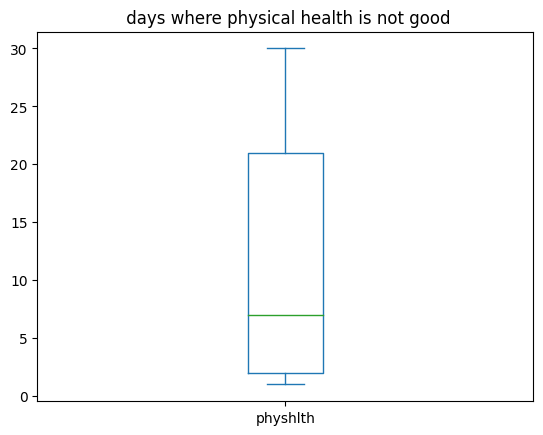

In [28]:
my_df.loc[mv1,'physhlth'].plot.box()
plt.title(' days where physical health is not good')

For this boxplot there is no invalid values also outliers

In [29]:
my_df.fvgreen.isna().sum()

5545

How many time per day eat dark green vegetables into tpd (time per day)

In [30]:
tpd= (my_df.fvgreen>=101) & (df.fvgreen<=199)
tpd.sum()

17443

Text(0.5, 1.0, ' How many time per day eat dark green vegetables ')

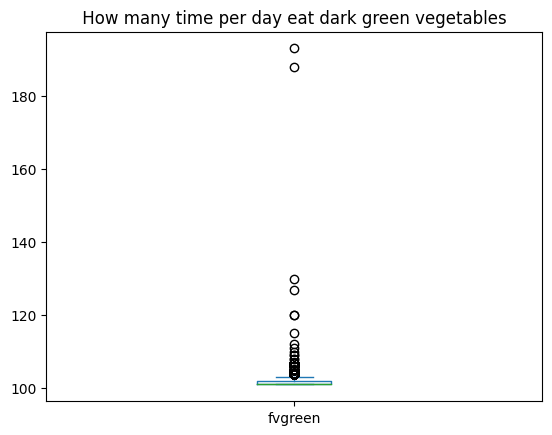

In [31]:
my_df.loc[tpd,'fvgreen'].plot.box()
plt.title(' How many time per day eat dark green vegetables ')

How many time per week eat dark green vegetables into tpw (time per week)

In [32]:
tpw= (my_df.fvgreen>=201) & (df.fvgreen<=299)
tpw.sum()

33408

Text(0.5, 1.0, ' How many time per Week eat dark green vegetables ')

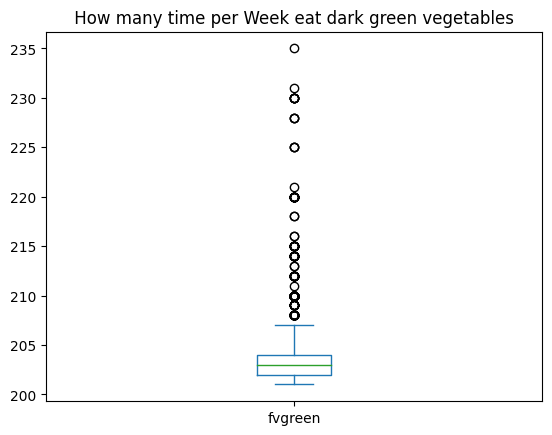

In [33]:
my_df.loc[tpw,'fvgreen'].plot.box()
plt.title(' How many time per Week eat dark green vegetables ')

How many time per Month eat dark green vegetables into tpm (time per Month)

In [34]:
tpm= (my_df.fvgreen>=301) & (df.fvgreen<=399)
tpm.sum()

34109

Text(0.5, 1.0, ' How many time per MONTH eat dark green vegetables ')

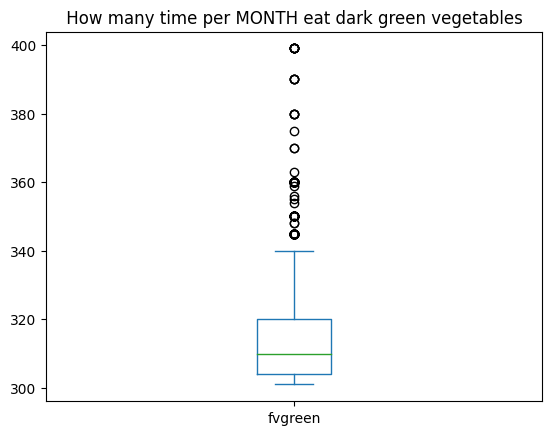

In [35]:
my_df.loc[tpm,'fvgreen'].plot.box()
plt.title(' How many time per MONTH eat dark green vegetables ')

For each grath ( per days/per Months/per week) it contains outliers

Question 9

In [36]:
my_df.fvgreen.value_counts()

101.0    12821
203.0     8728
202.0     8219
555.0     7431
201.0     6181
204.0     4986
320.0     4219
315.0     3937
310.0     3858
102.0     3548
205.0     3527
302.0     3333
305.0     3008
304.0     2444
303.0     2408
301.0     2077
330.0     1836
325.0     1702
306.0     1199
777.0     1012
308.0      970
312.0      837
206.0      788
307.0      761
103.0      747
207.0      689
999.0      591
300.0      461
328.0      238
314.0      229
104.0      177
316.0      132
210.0      119
318.0      116
105.0      110
321.0       79
322.0       74
309.0       74
324.0       63
360.0       61
340.0       54
345.0       50
317.0       50
327.0       48
208.0       45
326.0       43
329.0       37
323.0       32
350.0       29
212.0       27
313.0       25
214.0       23
220.0       23
311.0       20
215.0       19
335.0       15
107.0       13
106.0       13
209.0       12
331.0       11
399.0        8
319.0        6
230.0        6
380.0        4
390.0        4
338.0        3
225.0     

For fvgreen is a number of how many time of eating dark green vegetables that is between [101..399] so any other value are refused 

In [37]:
my_df.physhlth.value_counts()

88.0    61916
30.0     7803
2.0      5445
1.0      4054
3.0      3177
5.0      2862
10.0     2132
15.0     1954
7.0      1838
4.0      1767
77.0     1767
20.0     1300
14.0     1036
6.0       495
25.0      484
99.0      467
8.0       321
21.0      237
28.0      208
12.0      192
29.0      101
9.0        76
18.0       57
27.0       56
16.0       51
24.0       37
17.0       32
13.0       31
22.0       26
11.0       23
26.0       21
23.0       21
19.0       12
Name: physhlth, dtype: int64

For physhlth is a number that is between [0..30] so any other value are refused 

In [38]:
my_df.physhlth.value_counts()

88.0    61916
30.0     7803
2.0      5445
1.0      4054
3.0      3177
5.0      2862
10.0     2132
15.0     1954
7.0      1838
4.0      1767
77.0     1767
20.0     1300
14.0     1036
6.0       495
25.0      484
99.0      467
8.0       321
21.0      237
28.0      208
12.0      192
29.0      101
9.0        76
18.0       57
27.0       56
16.0       51
24.0       37
17.0       32
13.0       31
22.0       26
11.0       23
26.0       21
23.0       21
19.0       12
Name: physhlth, dtype: int64

In [39]:
my_df.physhlth.replace([])

0        20.0
1        88.0
2        88.0
3        88.0
4        88.0
5        88.0
6        88.0
7        88.0
8        88.0
9        30.0
10       88.0
11       88.0
12        2.0
13        3.0
14       88.0
15       14.0
16       88.0
17        4.0
18       88.0
19       88.0
20       88.0
21       30.0
22       88.0
23        7.0
24       88.0
25       88.0
26       88.0
27       88.0
28       88.0
29       88.0
30       88.0
31       88.0
32       88.0
33        3.0
34       88.0
35       88.0
36       16.0
37       88.0
38       88.0
39       30.0
40       25.0
41       30.0
42        2.0
43       88.0
44       88.0
45       88.0
46       15.0
47       88.0
48       88.0
49       88.0
50       88.0
51       88.0
52       88.0
53        3.0
54        2.0
55       30.0
56       88.0
57       88.0
58       30.0
59        3.0
60       88.0
61       88.0
62       88.0
63       10.0
64       10.0
65       88.0
66        6.0
67       88.0
68       77.0
69       88.0
70       88.0
71    

For asthma3 is a number that is like a boolean numbe 1 or 2 so any other value are refused like 7,9 

also For chcscncr is a number that is like a boolean numbe 1 or 2 so any other value are refused like 7,9 

Question 10:

In [ ]:
my_df.fvgreen.replace(['777','999'],np.nan, inplace=True)

In [ ]:
my_df.fvgreen.replace([555],0,inplace=True)

In [ ]:
# my_df.loc[(my_df.fvgreen==777) | (my_df.fvgreen==999),'fvgreen'] = np.nan

In [101]:
my_df.physhlth.replace(['77','99'],np.nan, inplace=True)

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\2064007746.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.physhlth.replace(['77','99'],np.nan, inplace=True)


In [ ]:
my_df.physhlth.replace([88],0,inplace=True)

In [ ]:
my_df.asthma3.replace(['7','9'],np.nan, inplace=True)

In [ ]:
# my_df.loc[(my_df.asthma3==7) | (my_df.asthma3==9),'asthma3'] = np.nan

In [93]:
my_df.chcscncr.replace(['7','9'],np.nan, inplace=True)

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\2577447638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.chcscncr.replace(['7','9'],np.nan, inplace=True)


# these command for checking the missing values for the variable chcscncr

In [97]:
my_df.loc[my_df.chcscncr==7]

Empty DataFrame
Columns: [chcscncr, asthma3, physhlth, fvgreen]
Index: []

In [98]:
my_df.loc[my_df.chcscncr==9]

Empty DataFrame
Columns: [chcscncr, asthma3, physhlth, fvgreen]
Index: []

In [99]:
my_df.chcscncr.value_counts()

2    90492
1     9234
Name: chcscncr, dtype: int64

# these command for checking the missing values for the variable physhlth


In [ ]:

my_df.loc[my_df.physhlth==77]


In [103]:
my_df.loc[my_df.physhlth==88]

Empty DataFrame
Columns: [chcscncr, asthma3, physhlth, fvgreen]
Index: []

In [ ]:
my_df.loc[my_df.physhlth==99]

In [ ]:
my_df.physhlth.value_counts()


# these command for checking the missing values for the variable fvgreen

In [105]:
my_df.loc[my_df.fvgreen==0]

chcscncr asthma3  physhlth  fvgreen
18           2       2       0.0      0.0
26           2       2       0.0      0.0
59           2       2       3.0      0.0
64           2       2      10.0      0.0
69           2       2       0.0      0.0
71           2       2       0.0      0.0
105          2       2      30.0      0.0
121          2       2       0.0      0.0
134          2       2       0.0      0.0
146          2       2       0.0      0.0
182          2       2       0.0      0.0
185          2       2       0.0      0.0
189          2       2       0.0      0.0
207          2       2      12.0      0.0
260          1       2      30.0      0.0
267          2       2       0.0      0.0
298          2       1      12.0      0.0
313          1       1      30.0      0.0
316          2       2       0.0      0.0
321          2       2       0.0      0.0
322          2       2       2.0      0.0
339          2       2       0.0      0.0
350          2       1       0.0      0.0
355          2       2       0.0      0.0
362          1       2       3.0      0.0
377          2       2       0.0      0.0
398          2       2       0.0      0.0
399          2       2       0.0      0.0
406          2       2       0.0      0.0
409          2       2      30.0      0.0
412          2       2       0.0      0.0
439          2       2       0.0      0.0
456          2       2       0.0      0.0
462          2       2       0.0      0.0
489          1       1       0.0      0.0
520          2       2       7.0      0.0
533          2       2       0.0      0.0
535          2       2       0.0      0.0
544          2       2       0.0      0.0
573          2       2       0.0      0.0
585          2       2       0.0      0.0
624          2       2       0.0      0.0
626          2       2       0.0      0.0
650          2       2      30.0      0.0
669          2       2       0.0      0.0
677          2       2       0.0      0.0
680          2       2       0.0      0.0
739          1       2      30.0      0.0
756          2       1      15.0      0.0
786          2       2       0.0      0.0
788          2       2      77.0      0.0
790          2       1       4.0      0.0
796          2       2       0.0      0.0
804          1       2       0.0      0.0
826          2       2       2.0      0.0
845          2       2      10.0      0.0
851          2       2       0.0      0.0
854          2       2       0.0      0.0
884          2       2       0.0      0.0
907          2       2       3.0      0.0
923          2       2       0.0      0.0
926          2       2       3.0      0.0
952          2       2      10.0      0.0
957          2       2       0.0      0.0
973          2       2      10.0      0.0
976          2       2       0.0      0.0
979          2       2       0.0      0.0
982          2       1      30.0      0.0
995          2       2      14.0      0.0
1020         2       2      25.0      0.0
1021         2       2       0.0      0.0
1035         2       2       0.0      0.0
1052         1       2       0.0      0.0
1071         2       2       0.0      0.0
1094         2       2       0.0      0.0
1095         2       2       2.0      0.0
1096         2       2       0.0      0.0
1104         2       2      30.0      0.0
1122         2       2      30.0      0.0
1132         1       2      10.0      0.0
1138         2       2       0.0      0.0
1143         2       2       5.0      0.0
1152         2       2       0.0      0.0
1160         1       2       0.0      0.0
1174         2       2       0.0      0.0
1200         2       2      15.0      0.0
1245         2       2       0.0      0.0
1246         2       2       0.0      0.0
1266         2       2       1.0      0.0
1271         2       1      30.0      0.0
1281         2       1      30.0      0.0
1288         2       2       0.0      0.0
1295         2       2       0.0      0.0
1298         1       2       0.0      0.0
1311         2  

In [106]:
my_df.loc[my_df.fvgreen==999]


chcscncr asthma3  physhlth  fvgreen
136          2       2      30.0    999.0
248          2       2      30.0    999.0
457          2       2       0.0    999.0
609          2       2       0.0    999.0
611          2       2       0.0    999.0
666          2       2       0.0    999.0
705          2       1      30.0    999.0
1434         2       2       0.0    999.0
1570         2       2      30.0    999.0
1642         2       2      29.0    999.0
1693         2       2       0.0    999.0
1958         2       2       0.0    999.0
2508         2       2       0.0    999.0
2778         2       2       2.0    999.0
2797         2       2       3.0    999.0
2845         2       2       0.0    999.0
2932         2       2       0.0    999.0
2940         2       2       1.0    999.0
3504         2       2       0.0    999.0
3620         2       2       0.0    999.0
3984         2       2       0.0    999.0
4182         1       2       0.0    999.0
4227         1       2       2.0    999.0
4583         2       2       0.0    999.0
5306         2       2       0.0    999.0
5309         2       2       0.0    999.0
5516         2       2       0.0    999.0
5548         2       2      15.0    999.0
5987         2       2       3.0    999.0
6164         2       2       5.0    999.0
6168         2       2      10.0    999.0
6210         2       2       0.0    999.0
6300         2       2      30.0    999.0
6634         2       2       0.0    999.0
6667         2       2      30.0    999.0
6744         2       2       0.0    999.0
6846         2       2       0.0    999.0
6848         2       2       1.0    999.0
7055         2       2      10.0    999.0
7059         2       2       0.0    999.0
7078         1       2       0.0    999.0
7126         2       2       0.0    999.0
7133         2       2       0.0    999.0
7152         2       2      30.0    999.0
7348         2       2       0.0    999.0
7569         2       2       0.0    999.0
7615         2       2       7.0    999.0
8205         2       2       0.0    999.0
8570         2       2       0.0    999.0
8574         2       2       0.0    999.0
8638         2       2       0.0    999.0
8982         2       1       0.0    999.0
9011         2       1       4.0    999.0
9249         2       2       0.0    999.0
9654         2       2       5.0    999.0
9792         2       2      15.0    999.0
10468        2       2       0.0    999.0
10524        2       2       0.0    999.0
10713        1       2       0.0    999.0
10812        1       2       0.0    999.0
10865        2       2       0.0    999.0
10874        2       2       5.0    999.0
11054        2       2      30.0    999.0
11174        2       2       0.0    999.0
11177        2       2       2.0    999.0
11795        2       2       0.0    999.0
11836        2       1      77.0    999.0
12023        2       2       0.0    999.0
12046        2       2       6.0    999.0
12259        2       2       0.0    999.0
12271        2       2       0.0    999.0
12419        2       2       4.0    999.0
12748        2       2       5.0    999.0
12833        2       2       0.0    999.0
12845        2       2       0.0    999.0
13283        2       1      77.0    999.0
13289        2       2       0.0    999.0
13360        2       2       0.0    999.0
13660        2       2       0.0    999.0
13811        2       2       0.0    999.0
13908        2       2       0.0    999.0
14015        2       2       0.0    999.0
14201        2       2      15.0    999.0
14359        2       2       0.0    999.0
14442        2       2      30.0    999.0
14566        2       2       0.0    999.0
14910        2       2       0.0    999.0
15065        2       2       0.0    999.0
15090        2       2       5.0    999.0
15423        2       2      77.0    999.0
15671        2       2       0.0    999.0
16081        2       1       0.0    999.0
16371        2       1      30.0    999.0
16392        2       2       0.0    999.0
16846        2  

In [107]:
my_df.loc[my_df.fvgreen==777]

chcscncr asthma3  physhlth  fvgreen
222          2       2       0.0    777.0
372          2       2       0.0    777.0
441          2       2       0.0    777.0
482          2       2       0.0    777.0
508          2       2       0.0    777.0
637          2       2       0.0    777.0
690          2       2       0.0    777.0
820          2       2      99.0    777.0
836          2       2       0.0    777.0
1057         2       2       0.0    777.0
1076         2       2       0.0    777.0
1191         2       1      25.0    777.0
1258         1       2       0.0    777.0
1412         1       2       0.0    777.0
1481         2       2       2.0    777.0
1635         2       2      77.0    777.0
1850         2       2       0.0    777.0
1868         2       2      29.0    777.0
1880         2       2       0.0    777.0
1920         2       2       0.0    777.0
2090         2       2       0.0    777.0
2246         2       2      77.0    777.0
2247         2       1      77.0    777.0
2427         2       2       0.0    777.0
2495         2       2      77.0    777.0
2519         2       1      30.0    777.0
2612         2       2      30.0    777.0
2614         2       2       0.0    777.0
2619         2       2      77.0    777.0
2869         2       2      77.0    777.0
2886         1       2       7.0    777.0
3183         2       2      30.0    777.0
3194         2       1      77.0    777.0
3204         2       2       0.0    777.0
3225         2       2       3.0    777.0
3238         2       2       5.0    777.0
3240         1       2       0.0    777.0
3340         2       2       0.0    777.0
3470         2       2       0.0    777.0
3544         2       1      30.0    777.0
3567         2       2       0.0    777.0
3593         2       2      99.0    777.0
3595         2       2       0.0    777.0
4035         2       1       0.0    777.0
4174         2       2       0.0    777.0
4177         2       2       0.0    777.0
4300         2       2       0.0    777.0
4339         1       2      77.0    777.0
4822         1       2       0.0    777.0
4957         2       1       0.0    777.0
4963         2       2       0.0    777.0
5092         2       2       0.0    777.0
5134         2       2       2.0    777.0
5481         2       2       0.0    777.0
5482         1       2       0.0    777.0
5494         2       2       0.0    777.0
5498         2       2      77.0    777.0
5553         2       2       0.0    777.0
5694         2       2       0.0    777.0
5832         2       2       0.0    777.0
5930         2       1      20.0    777.0
5980         2       1       0.0    777.0
6032         1       2      77.0    777.0
6246         2       2       2.0    777.0
6404         2       2       5.0    777.0
6428         2       2       0.0    777.0
6610         2       2       0.0    777.0
6729         2       2      30.0    777.0
6877         2       2       0.0    777.0
7024         2       2       0.0    777.0
7102         2       2       0.0    777.0
7105         1       2       0.0    777.0
7228         2       2       0.0    777.0
7252         2       2       0.0    777.0
7405         2       2      77.0    777.0
7454         2       1      77.0    777.0
7565         2       2       0.0    777.0
7566         2       2       0.0    777.0
7731         2       2      77.0    777.0
7738         2       2       0.0    777.0
7760         2       2       0.0    777.0
7818         2       2      77.0    777.0
7859         2       1       0.0    777.0
7938         2       2       0.0    777.0
7945         2       1       0.0    777.0
8038         2       2       4.0    777.0
8219         2       2       0.0    777.0
8261         2       2      77.0    777.0
8266         2       2      77.0    777.0
8267         2       2      30.0    777.0
8430         2       2       0.0    777.0
8594         2       2       0.0    777.0
8598         2       2      77.0    777.0
8645         2       2      30.0    777.0
8712         2  

In [108]:
my_df.fvgreen.value_counts()


101.0    12821
205.0     9072
203.0     8728
202.0     8219
0.0       7431
201.0     6181
204.0     4986
320.0     4219
315.0     3937
310.0     3858
102.0     3548
302.0     3333
305.0     3008
304.0     2444
303.0     2408
301.0     2077
330.0     1836
325.0     1702
306.0     1199
777.0     1012
308.0      970
312.0      837
206.0      788
307.0      761
103.0      747
207.0      689
999.0      591
300.0      461
328.0      238
314.0      229
104.0      177
316.0      132
210.0      119
318.0      116
105.0      110
321.0       79
322.0       74
309.0       74
324.0       63
360.0       61
340.0       54
345.0       50
317.0       50
327.0       48
208.0       45
326.0       43
329.0       37
323.0       32
350.0       29
212.0       27
313.0       25
214.0       23
220.0       23
311.0       20
215.0       19
335.0       15
107.0       13
106.0       13
209.0       12
331.0       11
399.0        8
319.0        6
230.0        6
380.0        4
390.0        4
338.0        3
225.0     

# these command for checking the missing values for the variable asthma3

In [109]:
my_df.loc[my_df.asthma3==2]


Empty DataFrame
Columns: [chcscncr, asthma3, physhlth, fvgreen]
Index: []

In [110]:
my_df.loc[my_df.asthma3==7]


Empty DataFrame
Columns: [chcscncr, asthma3, physhlth, fvgreen]
Index: []

In [111]:
my_df.loc[my_df.asthma3=='9']

Empty DataFrame
Columns: [chcscncr, asthma3, physhlth, fvgreen]
Index: []

In [112]:
my_df.asthma3.value_counts()

2    86090
1    13579
Name: asthma3, dtype: int64

Question 11:

In [113]:
print ('missing values for chcscncr',my_df.chcscncr.isnull().sum(),
'\n missing values for asthma3',my_df.asthma3.isnull().sum(),
'\n missing values for physhlth',my_df.physhlth.isnull().sum(),
'\n missing values for fvgreen',my_df.fvgreen.isnull().sum())

missing values for chcscncr 274 
 missing values for asthma3 331 
 missing values for physhlth 0 
 missing values for fvgreen 0


Question 12:

In [114]:
print ('missing values for chcscncr',my_df.chcscncr.isnull().mean(),
'\n missing values for asthma3',my_df.asthma3.isnull().mean(),
'\n missing values for physhlth',my_df.physhlth.isnull().mean(),
'\n missing values for fvgreen',my_df.fvgreen.isnull().mean())

missing values for chcscncr 0.00274 
 missing values for asthma3 0.00331 
 missing values for physhlth 0.0 
 missing values for fvgreen 0.0


we don't have to remove any one for these varibles(column) 
==> their missin values don't pass 30% 

Question 13: <br>
No one of these variables gonna be removed

Question 14:

In [115]:
my_df_without_missing = my_df.dropna()

In [116]:
my_df_without_missing.head()

chcscncr asthma3  physhlth  fvgreen
0        1       2      20.0    205.0
1        1       2       0.0    204.0
2        2       2       0.0    101.0
3        2       2       0.0    310.0
4        2       2       0.0    305.0

In [117]:
my_df_without_missing.shape

(99435, 4)

#Question 15 <br>
in general we have to save all the data for the training algorithm but for our case we lose a litle bit from our dataset<br> so it's normal to lose these missing rows 

Question 16
<br>
chcscncr: You Had Skin Cancer TRUE Or FALSE VARIABLE ( Categorial ) <br>
asthma3: you had asthma.? ( categorial ) <br>
physhlth: Number Of Days Physical Health Not Good (continuous )<br>
fvgreen:How Many Times Did You Eat Dark Green Vegetables (continuous)

In [118]:
my_df.physhlth.fillna(value=my_df.physhlth.median(),inplace=True)

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\2793982099.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.physhlth.fillna(value=my_df.physhlth.median(),inplace=True)


In [119]:
my_df.fvgreen.fillna(value=my_df.fvgreen.median(),inplace=True)

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\1205472704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.fvgreen.fillna(value=my_df.fvgreen.median(),inplace=True)


Question 17:
<br>
chcscncr: You Had Skin Cancer TRUE Or FALSE VARIABLE ( Categorial ) <br>
asthma3: you had asthma.? ( categorial ) <br>


In [126]:
my_df.chcscncr.isnull().value_counts()

False    99726
True       274
Name: chcscncr, dtype: int64

In [124]:
my_df.asthma3.value_counts()


2    86090
1    13579
Name: asthma3, dtype: int64

In [135]:
my_df.asthma3.fillna(my_df.asthma3.mode(),inplace=True)

C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\2318737103.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.asthma3.fillna(my_df.asthma3.mode(),inplace=True)


In [136]:
my_df.asthma3.isnull().value_counts()

False    99669
True       331
Name: asthma3, dtype: int64

In [133]:
my_df.chcscncr.fillna(my_df.chcscncr.mode(),inplace=True)


C:\Users\zbook studio g7\AppData\Local\Temp\ipykernel_4456\1854262567.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df.chcscncr.fillna(my_df.chcscncr.mode(),inplace=True)


In [134]:
my_df.chcscncr.isnull().value_counts()


False    99726
True       274
Name: chcscncr, dtype: int64